# Clip data test
<p> Sales by day of the week implemented <p>
<p> Author: Emilio López Hernández <p>

### Library import 

In [90]:
import pandas as pd
import plotly.graph_objects as go
import datetime
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import squarify 

### Data import

In [42]:
transactions_data = pd.read_csv('transactions_data.csv', sep=";")

In [43]:
transactions_data.head()

,transaction_date,total_amount,payment_method
0,02/06/2020,185,samsung pay
1,03/06/2020,100,visa
2,03/06/2020,350,mastercard
3,03/06/2020,500,si vale
4,04/06/2020,200,visa


### Data manipulation
<p> I get the day of the week through the transaction date <p>

In [44]:
transactions_data['transaction_date'] = transactions_data['transaction_date'].astype('datetime64[ns]')

In [45]:
transactions_data["day_of_week"] = transactions_data.transaction_date.dt.dayofweek

In [59]:
transactions_data.day_of_week[transactions_data.day_of_week == 0] = 'Lunes'
transactions_data.day_of_week[transactions_data.day_of_week == 1] = 'Martes'
transactions_data.day_of_week[transactions_data.day_of_week == 2] = 'Miercoles'
transactions_data.day_of_week[transactions_data.day_of_week == 3] = 'Jueves'
transactions_data.day_of_week[transactions_data.day_of_week == 4] = 'Viernes'
transactions_data.day_of_week[transactions_data.day_of_week == 5] = 'Sabado'
transactions_data.day_of_week[transactions_data.day_of_week == 6] = 'Domingo'

C:\Users\sesa573165\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sesa573165\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sesa573165\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sesa573165\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWi

In [60]:
transactions_data.head()

,transaction_date,total_amount,payment_method,day_of_week
0,2020-02-06,185,samsung pay,Jueves
1,2020-03-06,100,visa,Viernes
2,2020-03-06,350,mastercard,Viernes
3,2020-03-06,500,si vale,Viernes
4,2020-04-06,200,visa,Lunes


### Sales by day of the week calculation

In [75]:
sales_by_day = transactions_data[['day_of_week','total_amount']].groupby('day_of_week').sum()

In [67]:
sales_by_day = sales_by_day.reset_index()

### Sales by payment method calculation 

In [76]:
sales_by_payment_method = transactions_data[['payment_method','total_amount']].groupby('payment_method').sum()

In [77]:
sales_by_payment_method = sales_by_payment_method.reset_index()

### Data visualization

In [72]:
fig = go.Figure(data=[go.Pie(labels=sales_by_day.day_of_week, values=sales_by_day.total_amount, hole=.3, title="SALES BY DAY OF THE WEEK")])
fig.show()

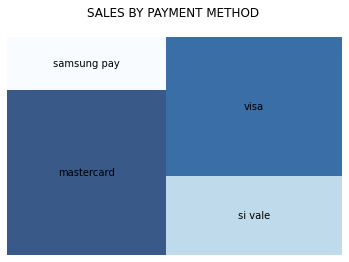

In [96]:
# create a color palette, mapped to these values
cmap = matplotlib.cm.Blues
mini=min(sales_by_payment_method.total_amount)
maxi=max(sales_by_payment_method.total_amount)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in sales_by_payment_method.total_amount]
 
# Change color
squarify.plot(sizes=sales_by_payment_method.total_amount, label= sales_by_payment_method.payment_method, alpha=.8, color=colors)
plt.axis('off')
plt.title("SALES BY PAYMENT METHOD \n")
plt.show()